<a href="https://colab.research.google.com/github/Patricia-Karel/Python/blob/main/ac2023A_pac2_Patricia_Paredes_Llerena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PEC 2. Aprendizaje supervisado: problemas de clasificación**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de poblemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación teniendo en cuenta temas relevantes de índole social, científica o ética.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes para estos problemas.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.

## Descripción de la PEC

Para ello, en este notebook tendréis que realizar 2 ejercicios que os guiarán en las tareas siguientes:

1. Descargar el conjunto de datos que utilizaremos para trabajar en un problema de clasificación.

2. Cargar el dataset escogido, limpiarlo, pre-procesarlo y dejarlo listo para realizar la clasificación.

3. Entrenar y evaluar clasificadores y optimizar sus parámetros.




## **Ejercicio 1**

En esta PEC utilizaremos el conjunto de datos **Cleveland Heart Disease**, que forma parte del conjunto de datos **Heart Disease**. Podéis obtener más información en el siguiente enlace:

https://archive.ics.uci.edu/dataset/45/heart+disease

Como veréis, el conjunto de datos original incluye cuatro subconjuntos. En esta PEC utilizaremos únicamente la versión procesada de Cleveland, que podéis descargar utilizando el código proporcionado en la siguiente celda.



In [ ]:
# Run this cell to load the dataset

!pip3 install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
features = heart_disease.data.features
targets = heart_disease.data.targets

**a) [1.5 puntos]** Una vez cargado el conjunto de datos debemos estudiar su contenido y preprocesar los datos para la aplicación de algoritmos de clasificación:
* ¿Cuántos atributos incluye el conjunto de datos?
* ¿Cuántos valores puede tomar la variable a predecir (*labels, target*) y a qué evento corresponden según la descripción del conjunto de datos?
* ¿Incluye valores nulos? Si los hay eliminad las muestras correspondientes (tened en cuenta que los valores nulos se pueden tratar de varias maneras que este ejercicio no puede abarcar en profundidad).


Para analizar los datos podéis utilizar funciones de la librería *pandas* y atributos de dataframes (*columns, head(), describe(), isnull()*) además de explorar el contenido y los metadatos de *heart_disease*.

In [ ]:
# ADD AND RUN YOUR CODE HERE

# Número de atributos
num_atributos = len(features.columns)
print("El conjunto de datos incluye", num_atributos, "atributos.")

# Número de valores que puede tomar la variable a predecir (labels, target)
valores_unicos = targets.squeeze().nunique()
print("La variable a predecir puede tomar", valores_unicos, "valores únicos.")

# Valores nulos
valores_nulos = features.isnull().sum().sum()
print("El conjunto de datos tiene", valores_nulos, "valores nulos.")

# Eliminacion de valores nulos
features = features.dropna().copy()
features.dropna(inplace=True)
targets = targets.reindex(features.index)

# Verificar si hay valores nulos después de la eliminación
valores_nulos_despues = features.isnull().sum().sum()
print("Después de eliminar los valores nulos, el conjunto de datos tiene", valores_nulos_despues, "valores nulos.")

El conjunto de datos incluye 13 atributos.
La variable a predecir puede tomar 5 valores únicos.
El conjunto de datos tiene 6 valores nulos.
Después de eliminar los valores nulos, el conjunto de datos tiene 0 valores nulos.


AÑADE TU RESPUESTA AQUÍ

El conjunto de datos Cleveland Heart Disease se refiere a bases de datos relacionado con la salud cardíaca de pacientes.
Este conjunto de datos incluye 13 atributos.
La variable a predecir se refiere a la presencia de enfermedad cardíaca en los pacientes, esta variable tiene 5 valores unicos: valores de 1 a 4, y la ausencia de cardiopatía con un valor de 0.
En cuanto a los valores nulos, encontramos 6 valores, y se opta por la eliminación de estas muestras, con esto se han limpiado los datos y están listos para su análisis posterior.

**b) [1.5 puntos]**
* Obtened y mostrad la cantidad de muestras disponibles para todas las clases incluídas y utilizad un diagrama de barras para representar los valores.
* ¿Os parece un conjunto de datos desbalanceado? ¿Qué particularidades tiene trabajar con un conjunto de datos desbalanceado?
* Agrupad las muestras en dos clases de manera que una sea la ausencia de patología y la segunda clase agrupe a todas las demás. Representar la cantidad de muestras en un nuevo diagrama de barras.

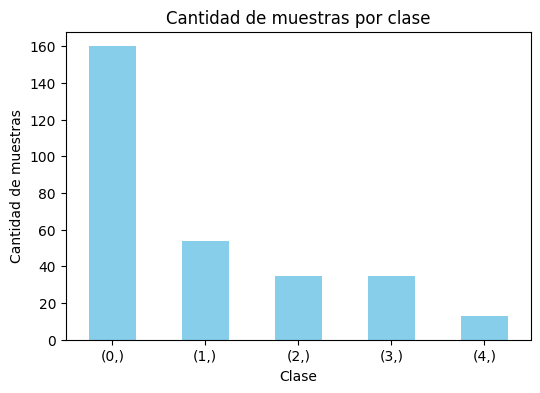

num
0      160
1      137
Name: count, dtype: int64


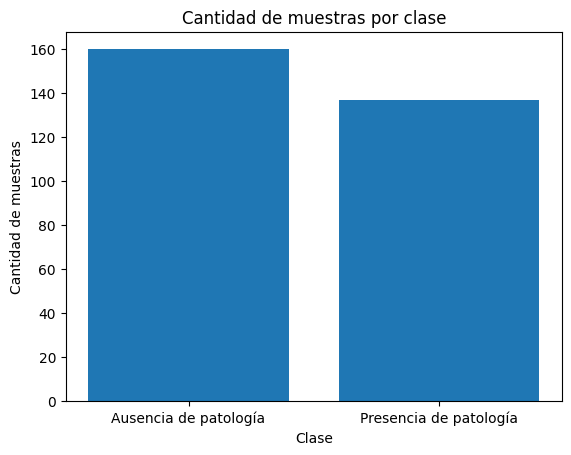

In [ ]:
# ADD AND RUN YOUR CODE HERE

import matplotlib.pyplot as plt

# Cantidad de muestras para cada clase
contar_clases = targets.value_counts()

# Diagrama de barras
plt.figure(figsize=(6, 4))
contar_clases.plot(kind='bar', color='skyblue')
plt.title('Cantidad de muestras por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.xticks(rotation=0)
plt.show()

# Creamos una nueva Serie para indicar si hay o no patología
targets_new = targets != 0

# Convertir valores booleanos a valores numéricos (0 y 1)
targets_new['num'] = targets_new['num'].astype(int)

# Contamos la cantidad de muestras con la nueva serie
contar_nueva_serie = targets_new.value_counts()
print(contar_nueva_serie)

# Diagrama de barras
plt.bar(['Ausencia de patología', 'Presencia de patología'], contar_nueva_serie.values)
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.title('Cantidad de muestras por clase')
plt.show()

AÑADE TU RESPUESTA AQUÍ

Es un conjunto de datos desbalanceado, las clases no tienen el mismo numero de muestras, la clase 0 tiene mucho mas muestras que las clases 1, 2, 3 y 4.
Un conjunto de datos desbalanceado implica que los algoritmos de aprendizaje automatico favorezcan a la clase mayoritaria y no puedan predecir con precision las clases con menos muestras.
Agrupamos la clase que no tiene la patologia 0, contra las clases que tienen algún nivel de patología en uno solo, disminuyendo asi el desbalance, sim embargo en este caso no podremos fiarnos del accuracy.

## **Ejercicio 2**

A partir de ahora trabajaremos con los datos resultantes del ejercicio anterior, es decir, con las dos clases descritas.

**a) [1 punto]** Normalizad los datos y separadlos en los conjuntos de entrenamiento y prueba, 70% y 30% respectivamente.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 42

# Normalización de los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Separamos los datos en conjuntos de entrenamiento y prueba (70% y 30% respectivamente)
f_e_train, f_e_test, t_train, t_test = train_test_split(features_scaled, targets_new, test_size=0.3, random_state=0)

print("Tamaño del conjunto de entrenamiento:", f_e_train.shape[0])
print("Tamaño del conjunto de prueba:", f_e_test.shape[0])

Tamaño del conjunto de entrenamiento: 207
Tamaño del conjunto de prueba: 90


In [ ]:
import numpy as np
import pandas as pd

targets_new = targets_new.values.ravel() if isinstance(targets_new, pd.DataFrame) else targets_new.ravel()
t_train = t_train.values.ravel() if isinstance(t_train, pd.DataFrame) else t_train.ravel()

**b) [1 punto]** Con los conjuntos obtenidos, entrenad un SVM y un árbol de decisión.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Modelos a entrenar
svm_model = svm.SVC(random_state=seed) #  Máquinas de vectores de soporte
tree_model = DecisionTreeClassifier(random_state=seed) # Árbol de decisión

# aplicamos un k-fold cross-validation para evaluar el algoritmo,
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_scores = cross_val_score(svm_model, features_scaled, targets_new, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
tree_scores = cross_val_score(tree_model, features_scaled, targets_new, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report the mean performance
print('F1-score SVM: %.3f' % svm_scores.mean())
print('F1-score Tree: %.3f' % tree_scores.mean())

# Entrenamos los modelos
svm_model.fit(f_e_train, t_train)
tree_model.fit(f_e_train, t_train)

F1-score SVM: 0.827
F1-score Tree: 0.735


DecisionTreeClassifier(random_state=42)

**c) [1 punto]** Mostrad las matrices de confusión correspondientes a los resultados de ambos algoritmos y comentadlos.

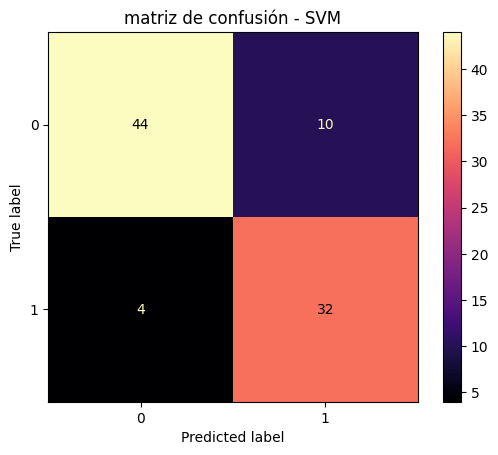

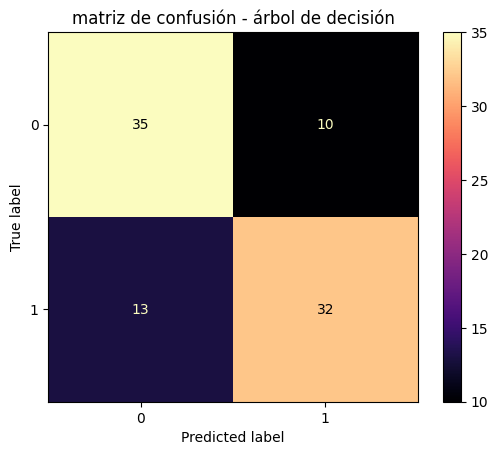

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import metrics

# Calculamos la matriz de confusión para SVM
svm_pred = svm_model.predict(f_e_test)
cm_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix\
 (svm_pred, t_test, labels=svm_model.classes_), display_labels=svm_model.classes_)
cm_svm.plot(cmap="magma")
plt.title('matriz de confusión - SVM')
plt.show()

# Calculamos matriz de confusión para árbol de decisión
tree_pred = tree_model.predict(f_e_test)
cm_tree = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix\
 (tree_pred, t_test, labels=tree_model.classes_), display_labels=tree_model.classes_)
cm_tree.plot(cmap="magma")
plt.title('matriz de confusión - árbol de decisión')
plt.show()

AÑADE TU RESPUESTA AQUÍ

Los resultados del entrenamiento de 90 muestras en ambos algortimos en la matriz de confusion muestran lo siguiente:

Donde 0 es Ausencia de patología y 1 es Presencia de patología.

- El modelo SVM ha confundido 14 muestras. Hay 44 muestras predecidas correctamente como "Ausente", y confunde 10 muestras positivas que predijo como negativas.  Luego, hay 32 muestras que el modelo predijo correctamente como "Presente" y confunde 4 muestras negativas y que el modelo predijo como positivas.

- El Arbol de decisión ha confundido 23 muestras. Hay 35 muestras que predice correctamente como "Ausente" pero confunde 10 muestras positivas como negativas. Por otro lado, hay 32 muestras que el modelo predijo correctamente como "Presente" y confunde 13 muestras negativas como positivas.

**d) [1 punto]** Para los dos clasificadores, obtened precision, recall y f1-score utilizando *sklearn.metrics.classification_report* y comentad los resultados.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.metrics import classification_report

# Reporte de clasificación para SVM
svm_classification_report = classification_report(t_test, svm_pred, target_names=["Patología Ausente", "Patología Presente"])
print("Reporte de Clasificación para SVM:")
print(svm_classification_report)

# Reporte de clasificación para árbol de decisión
tree_classification_report = classification_report(t_test, tree_pred, target_names=["Patología Ausente", "Patología Presente"])
print("Reporte de Clasificación para Árbol de Decisión:")
print(tree_classification_report)

Reporte de Clasificación para SVM:
                    precision    recall  f1-score   support

 Patología Ausente       0.81      0.92      0.86        48
Patología Presente       0.89      0.76      0.82        42

          accuracy                           0.84        90
         macro avg       0.85      0.84      0.84        90
      weighted avg       0.85      0.84      0.84        90

Reporte de Clasificación para Árbol de Decisión:
                    precision    recall  f1-score   support

 Patología Ausente       0.78      0.73      0.75        48
Patología Presente       0.71      0.76      0.74        42

          accuracy                           0.74        90
         macro avg       0.74      0.75      0.74        90
      weighted avg       0.75      0.74      0.74        90



AÑADE TU RESPUESTA AQUÍ

Basandonos en las metricas, podemos decir que el modelo SVM tiene mejor precision y sensibilidad (recall), con un f1-score ponderado promedio de 0.84, contra el modelo de arbol de decision con un 0.74 este último por lo tanto menor precisión y recall.

**e) [1.5 puntos]** Utilizando sklearn.model_selection.GridSearchCV optimizar el SVM anterior (que utiliza parámetros por defecto) explorando los parámetros y valores siguientes:
* C: 0.1, 1, 10, 100
* kernel: linear, poly, rbf

Mostrad la mejor combinación de parámetros obtenida.

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.model_selection import GridSearchCV

# Definir los parámetros a explorar
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf']}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,\
                           scoring='accuracy', cv=cv, n_jobs=-1)

# Búsqueda de cuadrícula
grid_search.fit(features_scaled, targets_new)

# Mejor combinación de parámetros obtenida.
print("Mejor combinación de parámetros encontrada:")
print(grid_search.best_params_)

Mejor combinación de parámetros encontrada:
{'C': 0.1, 'kernel': 'rbf'}


**f) [0.5 puntos]** Entrenad de nuevo el SVM en los subconjuntos de entrenamiento y prueba del ejercicio 2a pero utilizando los mejores parámetros obtenidos en el apartado anterior. Obtened la matriz de confusion, precisión, recall y f1-score y comparad los resultados con los obtenidos en el apartado 2c.

Reporte de Clasificación del SVM con los mejores parámetros:
                    precision    recall  f1-score   support

 Patología Ausente       0.78      0.94      0.85        48
Patología Presente       0.91      0.69      0.78        42

          accuracy                           0.82        90
         macro avg       0.84      0.81      0.82        90
      weighted avg       0.84      0.82      0.82        90



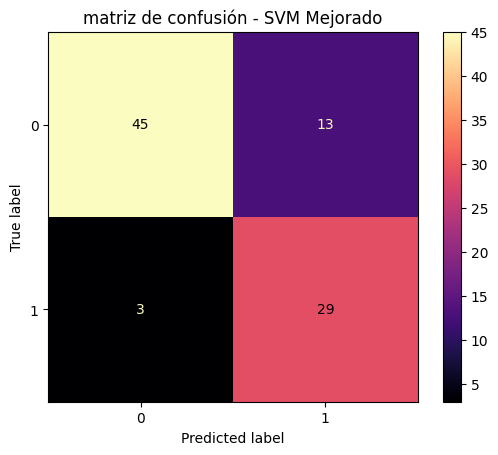

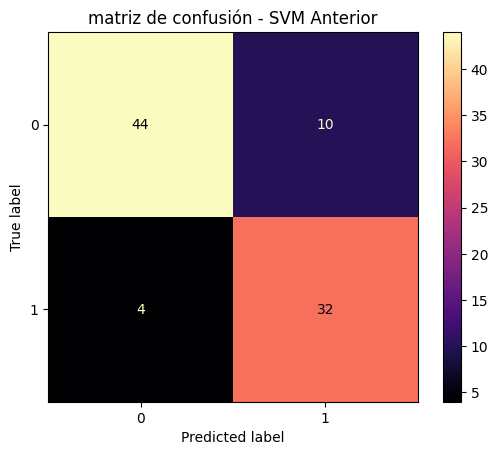

<Figure size 400x200 with 0 Axes>

In [ ]:
# ADD AND RUN YOUR CODE HERE

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# SVM con los mejores parámetros
svm_model_mejorado = svm.SVC(C=0.1, kernel='rbf', random_state=seed)
svm_model_mejorado.fit(f_e_train, t_train)
svm_pred_m = svm_model_mejorado.predict(f_e_test)

# Reporte del modelo mejorado
svm_classification_report_m = classification_report(t_test, svm_pred_m, target_names=["Patología Ausente", "Patología Presente"])
print("Reporte de Clasificación del SVM con los mejores parámetros:")
print(svm_classification_report_m)

# Nueva matriz de confusión para SVM Mejorado
cm_svm_mejorado = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix\
 (svm_pred_m, t_test, labels=svm_model_mejorado.classes_),\
                                         display_labels=svm_model_mejorado.classes_)
cm_svm_mejorado.plot(cmap="magma")
plt.title('matriz de confusión - SVM Mejorado')
plt.show()

# Matriz de confusión para SVM - Primera
cm_svm.plot(cmap="magma")
plt.title('matriz de confusión - SVM Anterior')
plt.figure(figsize=(4, 2))
plt.show()

AÑADE TU RESPUESTA AQUÍ

Comparación de las matrices de confusion

- El primer modelo SVM confunde 14 muestras.

  Hay 44 muestras predecidas correctamente como negativos
  Confunde 10 muestras positivas que predijo como negativos.
  Hay 32 muestras que el modelo predijo correctamente como positivos.
  confunde 4 muestras negativas y que el modelo predijo como positivas.

- El modelo SVM mejorado ha confundido 16 muestras.

 Hay 45 muestras predecidas correctamente como negativos.
 confunde 13 muestras positivas que predijo como negativos.  
 Hay 29 muestras que el modelo predijo correctamente como positivos.
 confunde 3 muestras negativas y que el modelo predijo como positivas.

Conclusiones:

Ambos modelos muestran un buen rendimiento general, son capaces de clasificar correctamente alrededor del 82-84% de las muestras del conjunto de prueba.

El primer modelo SVM muestra un mejor rendimiento en la identificación de la clase "Patología Ausente", con una precisión y F1-score más altos en comparación con el modelo mejorado.

Por otro lado, el modelo mejorado muestra un rendimiento ligeramente mejor en la identificación de la clase "Patología Presente", con una precisión más alta pero un recall ligeramente menor.

En relación a las matrices de confusión de ambos modelos, podemos ver dónde se están los errores, el primer modelo SVM parece tener menos falsos negativos (muestras de "Patología Presente" clasificadas incorrectamente como "Patología Ausente"), mientras que el modelo mejorado tiene menos falsos positivos (muestras de "Patología Ausente" clasificadas incorrectamente como "Patología Presente").

**g) [1 punto]** A la hora de entrenar y evaluar un clasificador es importante llevar a cabo un tratamiento adecuado de los datos y utilizar prodecidimientos y métricas que nos permitan obtener resultados que reflegen correctamente la bondad de los modelos entrenados. Teniendo en cuenta los datos y los atributos incluídos ¿qué otro tipo de análisis llevaríais a cabo para asegurar un mejor estudio de la bondad de los modelos? (Nota: revisad la noción de sesgo algorítmico, *algorithm bias*).


AÑADE TU RESPUESTA AQUÍ

Para mejorar la bondad de los modelos realizados en esta PEC:

- Se pueden realizar análisis de equidad algorítmica para identificar y mitigar posibles sesgos en la predicción del modelo en función de características protegidas, como género, raza o edad.

- Realizar análisis de sensibilidad para evaluar cómo varían las predicciones del modelo ante cambios en los datos de entrada o parámetros del modelo.

- En este caso que teniamos un conjunto de datos desbalanceado podemos utilizar la validación cruzada estratificada para garantizar que la distribución de clases se mantenga en cada pliegue de entrenamiento y prueba.

- Analizar qué tipos de errores comete con más frecuencia y si hay patrones o tendencias específicas.


## **Fuentes y recursos de interés**:
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/

###Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.
